In [896]:
!pip install leidenalg

In [897]:
import leidenalg

In [898]:
pip install --user scikit-misc

Note: you may need to restart the kernel to use updated packages.


In [899]:
!pip install scrublet

In [900]:
import scanpy as sc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scrublet as scr

In [901]:
# Reading the file and creating an adata object
file = '/home/mtk13/Downloads/GSE67835_CPM_named_clean.tsv'

adata = sc.read_text(file, delimiter='\t').T 
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [902]:
adata

AnnData object with n_obs × n_vars = 466 × 46766

In [903]:
results_file = 'brain.h5ad' 

# Preprocessing

In [904]:
#Detect doublets using scr
scrub = scr.Scrublet(adata.X)
doublet_score, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3)

#Add to adata
adata.obs['scrublet_scores'] = doublet_score
adata.obs['scrublet_predicted_doublets'] = predicted_doublets

#Remove
adata = adata[~adata.obs['scrublet_predicted_doublets'], :]

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 3.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 86.7%
Elapsed time: 0.5 seconds


In [905]:
# sc.pp.filter_genes(adata, min_cells=10)
# scvi.model.SCVI.setup_anndata(adata)
# vae = scvi.model.SCVI(adata)
# vae.train()


# solo = scvi.external.SOLO.from_scvi_model(vae)
# solo.train()


/home/mtk13/source.bashrc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


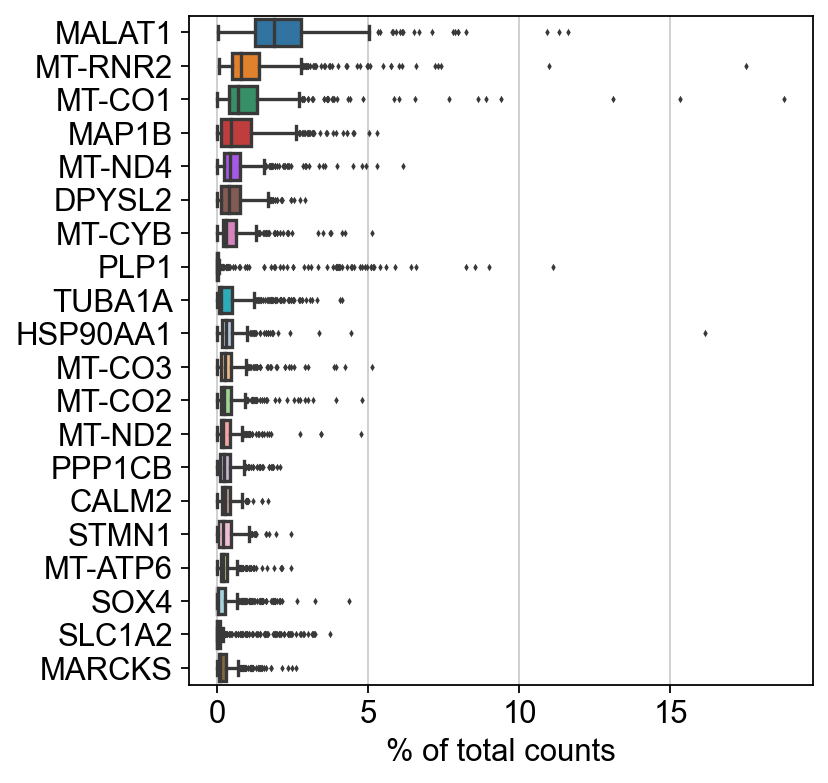

In [906]:
# Visualisation of the top 20 highest expressed genes
sc.pl.highest_expr_genes(adata, n_top=20, )

In [907]:
# This can be used to find the cell and gene names
# adata.var_names
# adata.obs_names

In [908]:
# Simple filtering 
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 11799 genes that are detected in less than 3 cells


In [909]:
# Adds a column with a boolean whether a mitochrondrial gene is present
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [910]:
# Visualising the genes which are mitochondrial
adata.var[adata.var.mt == True]

,n_cells,mt
MT-ATP6,453,True
MT-ATP8,451,True
MT-CO1,453,True
MT-CO2,453,True
MT-CO3,453,True
MT-CYB,451,True
MT-ND1,452,True
MT-ND2,453,True
MT-ND3,424,True
MT-ND4,453,True


In [911]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [912]:
adata

AnnData object with n_obs × n_vars = 453 × 34967
    obs: 'scrublet_scores', 'scrublet_predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

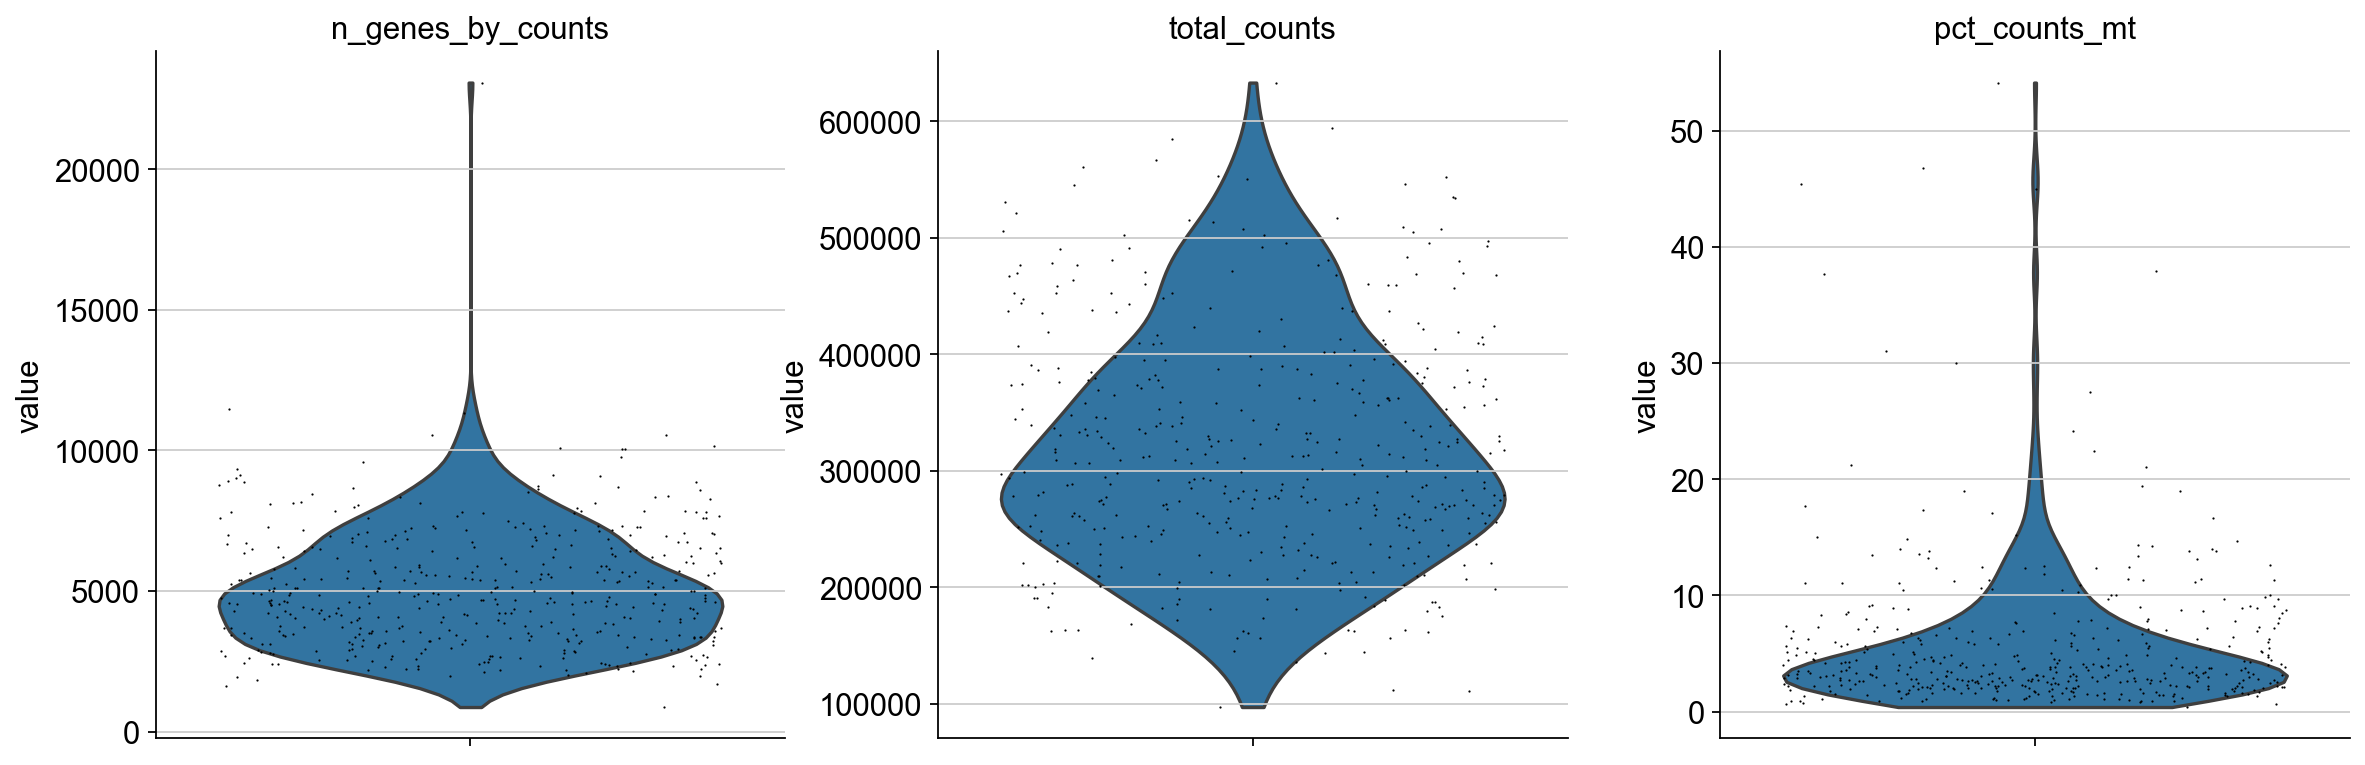

In [913]:
# Violin plots for number of genes expressed in the matrix, total counts per cell and % counts in mt cells
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [914]:
# Identifying the cell that has over 50% mitochondrial genes
adata.obs[adata.obs.pct_counts_mt > 50]

,scrublet_scores,scrublet_predicted_doublets,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
SRR1974727,0.211679,False,6215,6184,300084.9375,162458.9375,54.137653


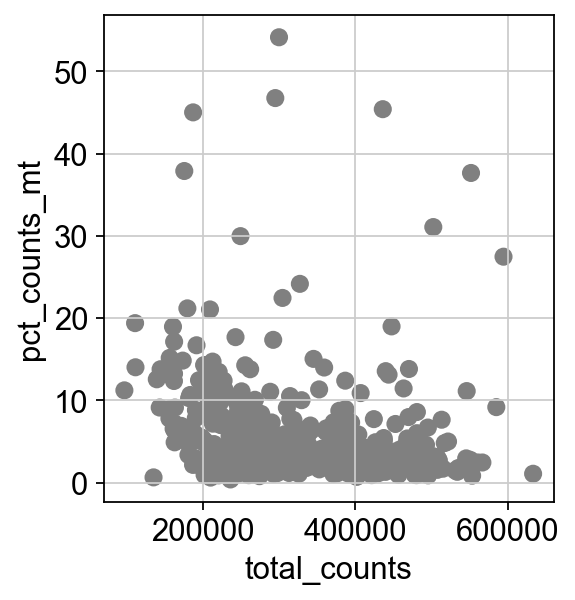

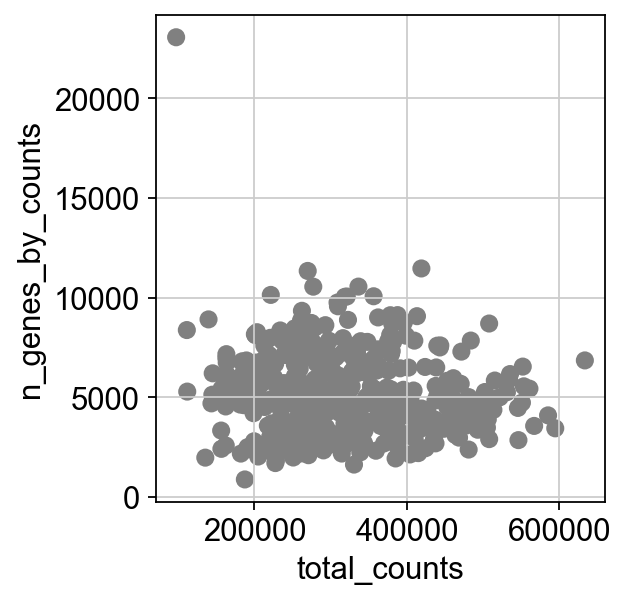

In [915]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [916]:
# Selecting genes that have a % mitochondrial count of 10%
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [917]:
sc.pp.log1p(adata)

/home/mtk13/source.bashrc/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [918]:
# Highly variable genes using default calues

sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor='seurat_v3')


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/mtk13/source.bashrc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


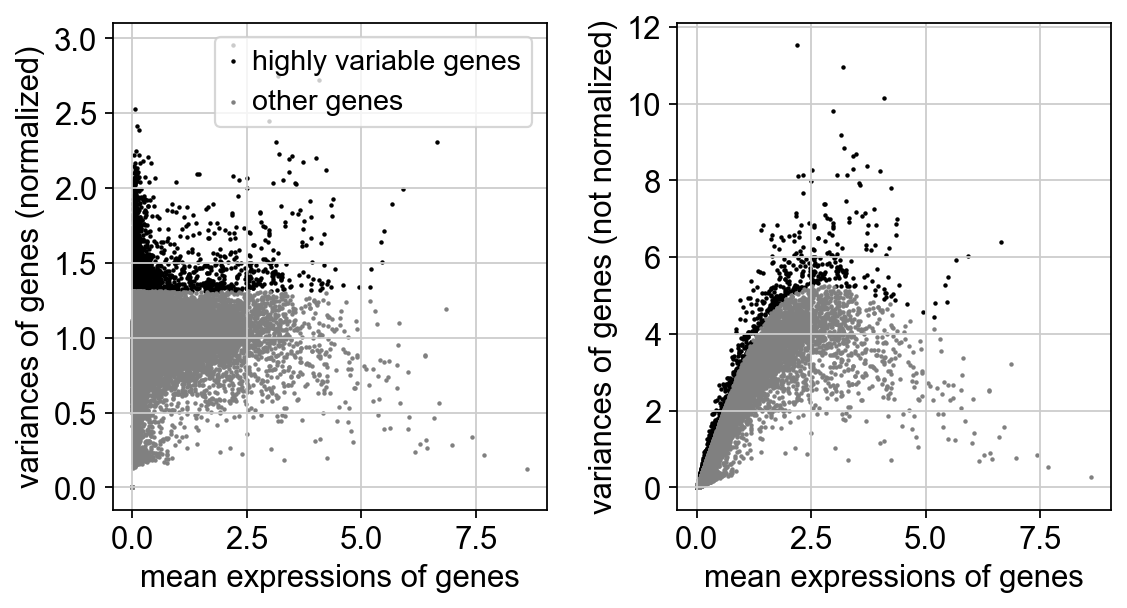

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
A1CF,13,False,13,1.070626,97.130243,484.993439,True,462.0,0.044110,0.169564,1.691290
A2M,119,False,119,66.993271,73.730684,30347.953125,True,680.0,0.823137,3.419261,1.628037
A2M-AS1,11,False,11,1.019288,97.571744,461.737305,True,1628.0,0.058314,0.201161,1.477189
A2MP1,42,False,42,3.263869,90.728477,1478.532471,True,3178.0,0.227916,0.798848,1.352003
AASS,228,False,228,117.569336,49.668874,53258.910156,True,437.0,2.116204,6.581641,1.702393
...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN20,20,False,20,1.866651,95.584989,845.592773,True,1323.0,0.109575,0.404900,1.512475
ZSCAN32,70,False,70,8.834150,84.547461,4001.870117,True,3861.0,0.408978,1.409849,1.316495
ZSCAN9,50,False,50,7.391179,88.962472,3348.203857,True,3713.0,0.317377,1.099839,1.323775
ZSWIM3,16,False,16,1.194438,96.467991,541.080566,True,1742.0,0.077796,0.271416,1.463631


In [919]:
sc.pl.highly_variable_genes(adata)
adata.var[adata.var.highly_variable]

In [920]:
adata.raw = adata

In [921]:
# Filtering out the genes that aren't highly variable
adata = adata[:, adata.var.highly_variable]

In [922]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:04)


In [923]:
sc.pp.scale(adata, max_value=10)

# Principal Component Analysis

In [924]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


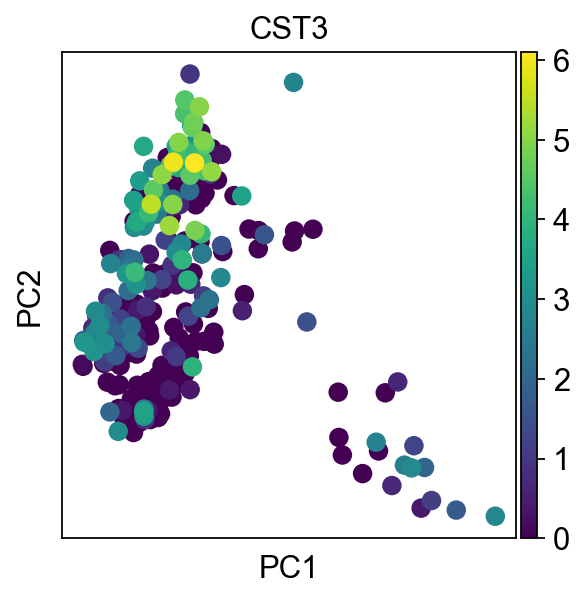

In [925]:
sc.pl.pca(adata, color='CST3')

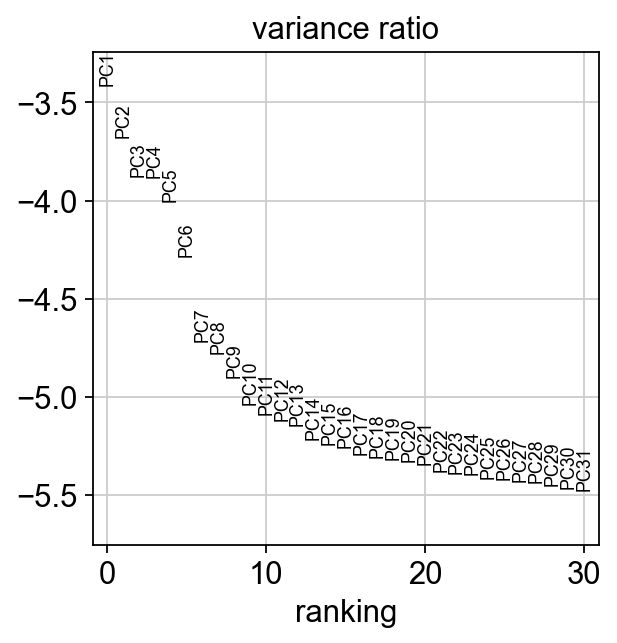

In [926]:
sc.pl.pca_variance_ratio(adata, log=True)

In [927]:
adata.write(results_file)

In [928]:
adata

AnnData object with n_obs × n_vars = 390 × 4000
    obs: 'scrublet_scores', 'scrublet_predicted_doublets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [929]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [930]:
sc.tl.tsne(adata, n_pcs=40)

computing tSNE
    using 'X_pca' with n_pcs = 40
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:01)


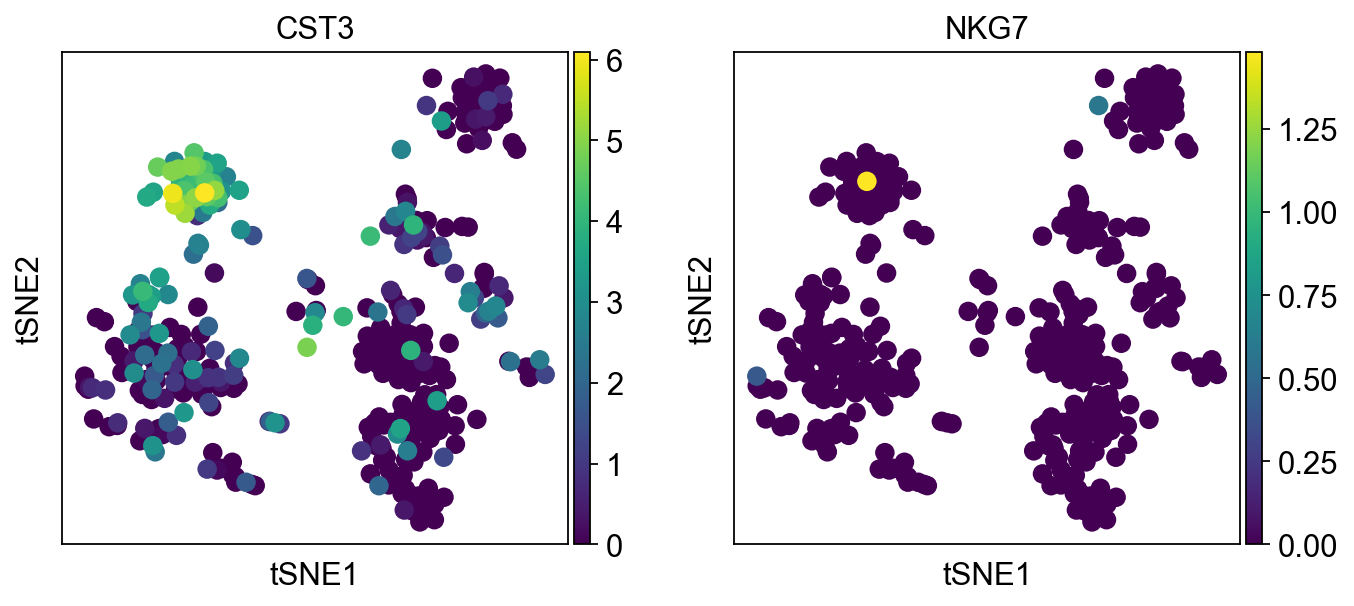

In [931]:
sc.pl.tsne(adata, color=['CST3', 'NKG7'])

In [932]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


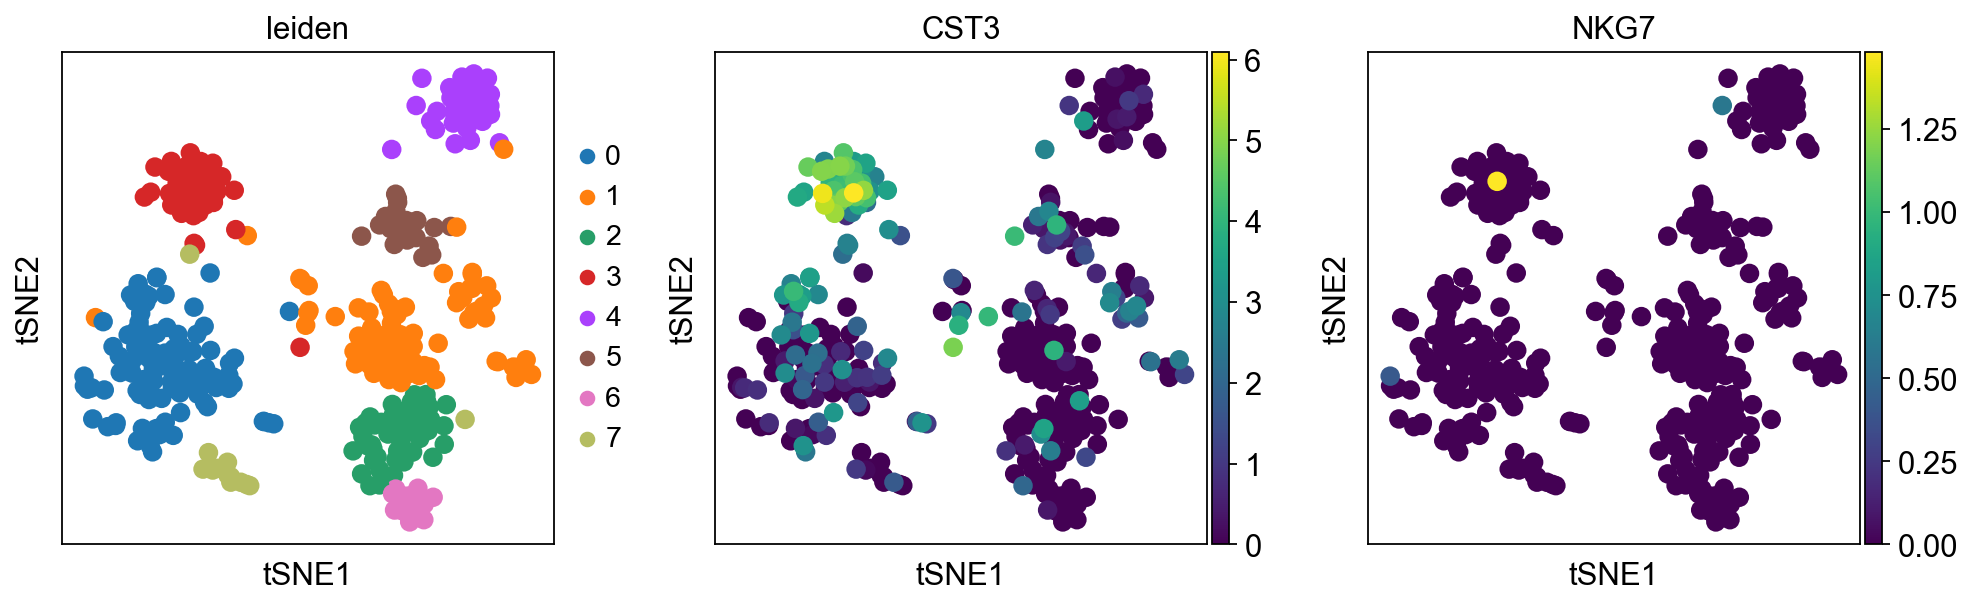

In [933]:
sc.pl.tsne(adata, color=['leiden', 'CST3', 'NKG7'])

# Finding Marker Genes

In [934]:
sc.tl.leiden(adata, resolution=1.3)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


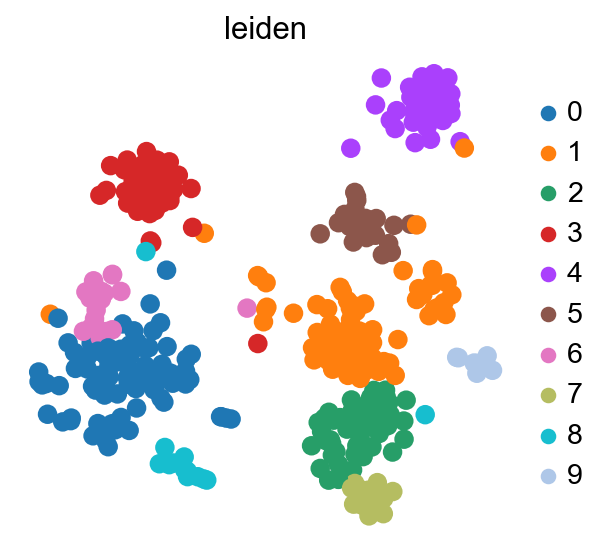

In [935]:
sc.pl.tsne(adata, color = ['leiden'], frameon = False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


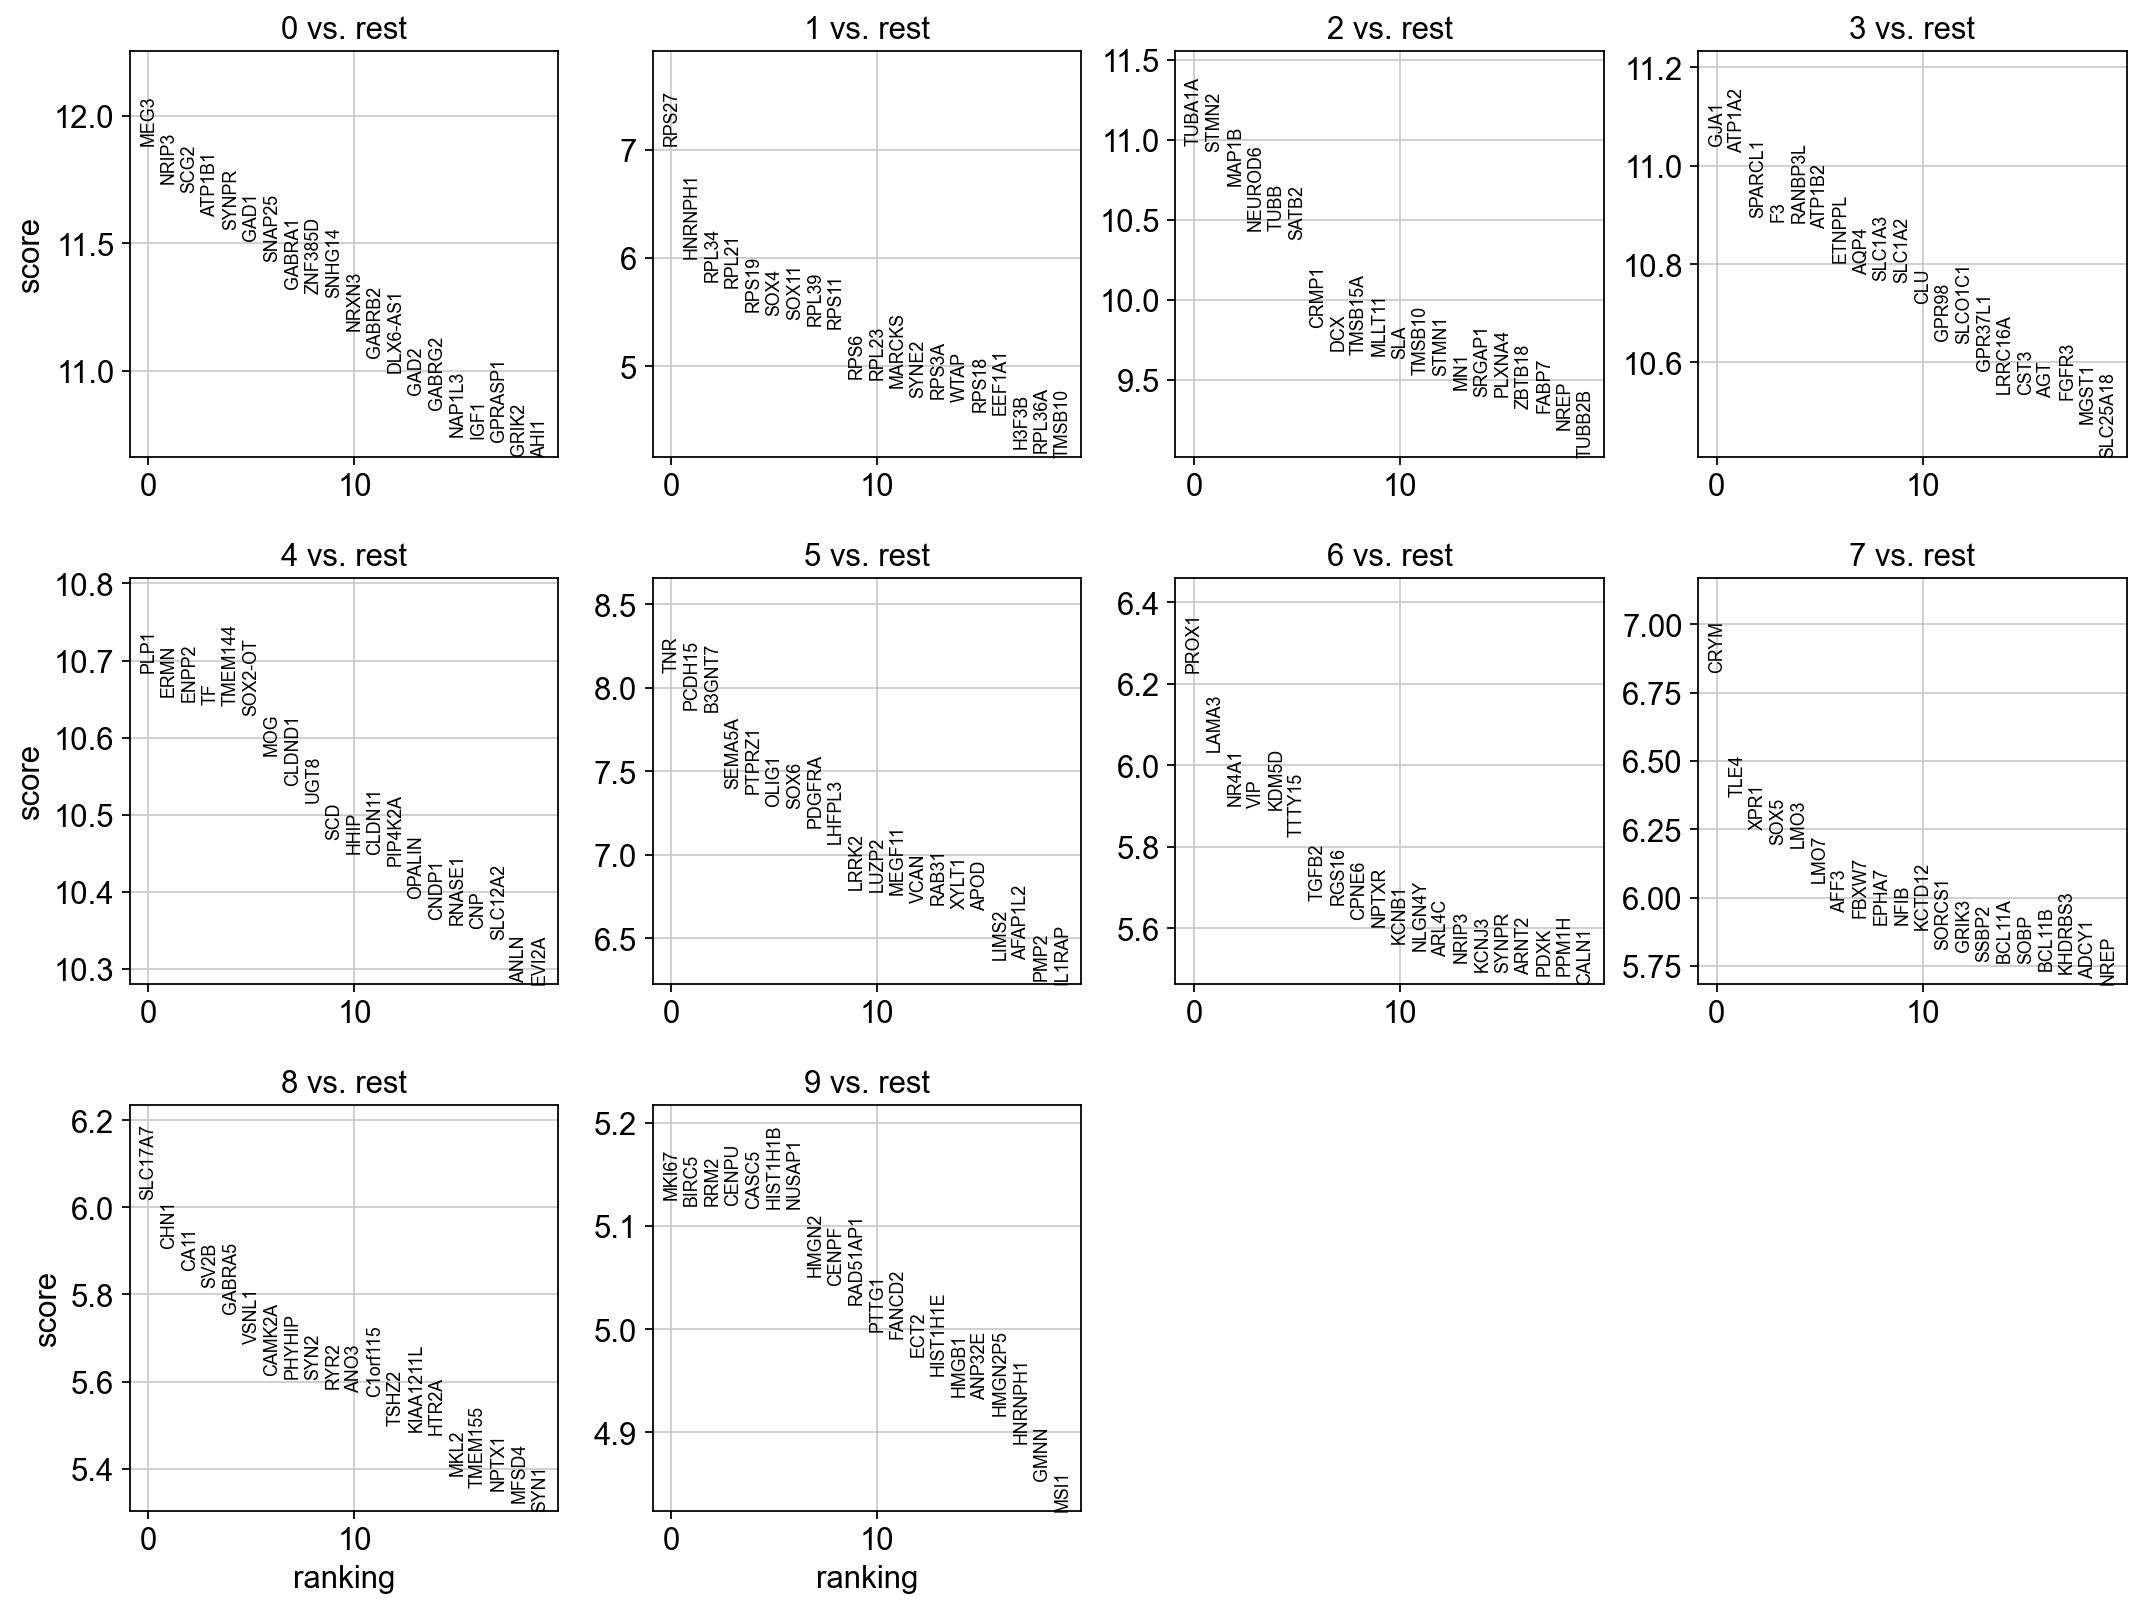

In [936]:
# Plots the top 20 genes per cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [937]:
# Identifying the genes in the first cluster
print(adata.uns['rank_genes_groups']['names']['0'])

['MEG3' 'NRIP3' 'SCG2' ... 'SCD' 'NHSL1' 'NFIA']


In [938]:
sc.get.rank_genes_groups_df(adata, None)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MEG3,11.885652,5.765896,1.405346e-32,4.914072e-28
1,0,NRIP3,11.735269,6.351539,8.405943e-32,1.449454e-27
2,0,SCG2,11.702087,6.095642,1.243562e-31,1.449454e-27
3,0,ATP1B1,11.605221,4.453913,3.876837e-31,3.389034e-27
4,0,SYNPR,11.555450,6.676019,6.928347e-31,4.845270e-27
...,...,...,...,...,...,...
349665,9,MYT1L,-3.774034,-8.976316,1.606291e-04,4.287572e-02
349666,9,PRNP,-3.796471,-34.354774,1.467703e-04,4.073110e-02
349667,9,ATP6V0A1,-3.809934,-32.964153,1.390039e-04,3.951666e-02
349668,9,SCG3,-3.865280,-6.496428,1.109616e-04,3.394647e-02


In [939]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MEG3,11.885652,5.765896,1.405346e-32,4.914072e-28
1,0,NRIP3,11.735269,6.351539,8.405943e-32,1.449454e-27
2,0,SCG2,11.702087,6.095642,1.243562e-31,1.449454e-27
3,0,ATP1B1,11.605221,4.453913,3.876837e-31,3.389034e-27
4,0,SYNPR,11.555450,6.676019,6.928347e-31,4.845270e-27
...,...,...,...,...,...,...
314833,9,BARD1,3.747108,5.373887,1.788849e-04,4.599315e-02
314834,9,TNC,3.723175,6.801892,1.967334e-04,4.972271e-02
314835,9,MAD2L1,3.723175,7.036113,1.967334e-04,4.972271e-02
314836,9,BAZ1A,3.720183,5.045045,1.990786e-04,4.972271e-02


In [940]:
# Get the marker genes for each cluster
marker_genes = {}
for i in adata.uns['rank_genes_groups']['names'].dtype.names:
    marker_genes[i] = adata.uns['rank_genes_groups']['names'][i][:10] # Change 10 to the number of markers you want to retrieve

In [941]:
# Print the top 10 marker genes for each cluster
for i in marker_genes.keys():
    print(f'Cluster {i}: {", ".join(marker_genes[i])}')

Cluster 0: MEG3, NRIP3, SCG2, ATP1B1, SYNPR, GAD1, SNAP25, GABRA1, ZNF385D, SNHG14
Cluster 1: RPS27, HNRNPH1, RPL34, RPL21, RPS19, SOX4, SOX11, RPL39, RPS11, RPS6
Cluster 2: TUBA1A, STMN2, MAP1B, NEUROD6, TUBB, SATB2, CRMP1, DCX, TMSB15A, MLLT11
Cluster 3: GJA1, ATP1A2, SPARCL1, F3, RANBP3L, ATP1B2, ETNPPL, AQP4, SLC1A3, SLC1A2
Cluster 4: PLP1, ERMN, ENPP2, TF, TMEM144, SOX2-OT, MOG, CLDND1, UGT8, SCD
Cluster 5: TNR, PCDH15, B3GNT7, SEMA5A, PTPRZ1, OLIG1, SOX6, PDGFRA, LHFPL3, LRRK2
Cluster 6: PROX1, LAMA3, NR4A1, VIP, KDM5D, TTTY15, TGFB2, RGS16, CPNE6, NPTXR
Cluster 7: CRYM, TLE4, XPR1, SOX5, LMO3, LMO7, AFF3, FBXW7, EPHA7, NFIB
Cluster 8: SLC17A7, CHN1, CA11, SV2B, GABRA5, VSNL1, CAMK2A, PHYHIP, SYN2, RYR2
Cluster 9: MKI67, BIRC5, RRM2, CENPU, CASC5, HIST1H1B, NUSAP1, HMGN2, CENPF, RAD51AP1


In [942]:
table = 'SraRunTable.txt'

In [943]:
sra_table = pd.read_csv(table)
matrix = pd.read_csv(file, delimiter='\t')

In [944]:
# samples is a dictionary containing sample identifier as key and a list of cells as values
samples = {}
for index, sample in enumerate(sra_table.experiment_sample_name):
    samples.setdefault(sample, []).append(sra_table.Run[index])

# this code visualises the individual samples within the count matrix
# for sample in samples.values():
#     print(matrix[matrix.columns[matrix.columns.isin(sample)]])

In [945]:
adata.obs['sample_identifier'] = False

In [946]:
for index, row in enumerate(adata.obs_names):
    for key, value in samples.items():
        if row in value:
            adata.obs.sample_identifier.iloc[index] = key  

<ipython-input-946-a66bdcabcd67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.sample_identifier.iloc[index] = key


In [947]:
adata.obs

,scrublet_scores,scrublet_predicted_doublets,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,sample_identifier
SRR1974543,0.121951,False,5019,4984,459287.875000,18652.886719,4.061263,4,AB_S8
SRR1974545,0.061889,False,3734,3623,371774.187500,15834.530273,4.259180,4,AB_S8
SRR1974546,0.138298,False,4636,4576,236967.734375,10817.853516,4.565117,0,AB_S8
SRR1974548,0.085937,False,5466,5460,258048.875000,18724.302734,7.256107,5,AB_S8
SRR1974549,0.096234,False,4136,4127,467417.250000,20668.378906,4.421826,4,AB_S8
...,...,...,...,...,...,...,...,...,...
SRR1975003,0.085937,False,2717,2701,343686.000000,12892.471680,3.751235,1,FB_S6
SRR1975004,0.085937,False,3587,3582,460477.000000,9480.000000,2.058735,2,FB_S6
SRR1975005,0.121951,False,3371,3357,332607.937500,12795.411133,3.846995,2,FB_S6
SRR1975007,0.157895,False,4717,4714,352989.312500,5691.477539,1.612365,2,FB_S6


In [948]:
cell_type = {"0":"NEURONS",
"1":"FETAL REPLICATING",
"2":"FETAL QUIESCENT",
"3":"ASTROCYTES",
"4":"OLIGODENDROCYTES",
"5":"ENDOTHILIAL",
"6":"OLIGODENDROCYTE PROGENITOR CELLS(OPCs)",
"7":"NEURONS",
"8":"HYBRID",
"9":"MICROGLIA",
    }

In [949]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

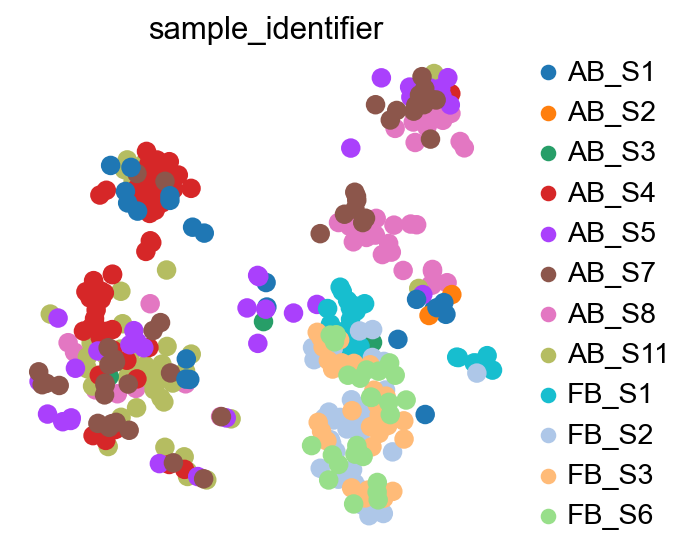

In [950]:
sc.pl.tsne(adata, color = ['sample_identifier'], frameon = False)

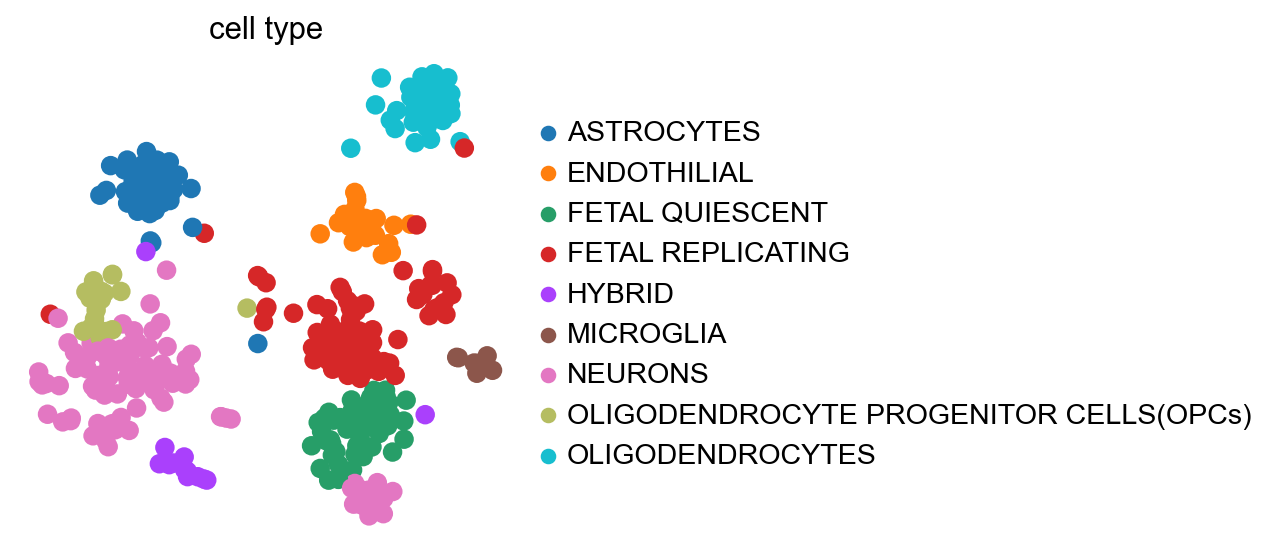

In [951]:
sc.pl.tsne(adata, color = ['cell type'], frameon = False,)

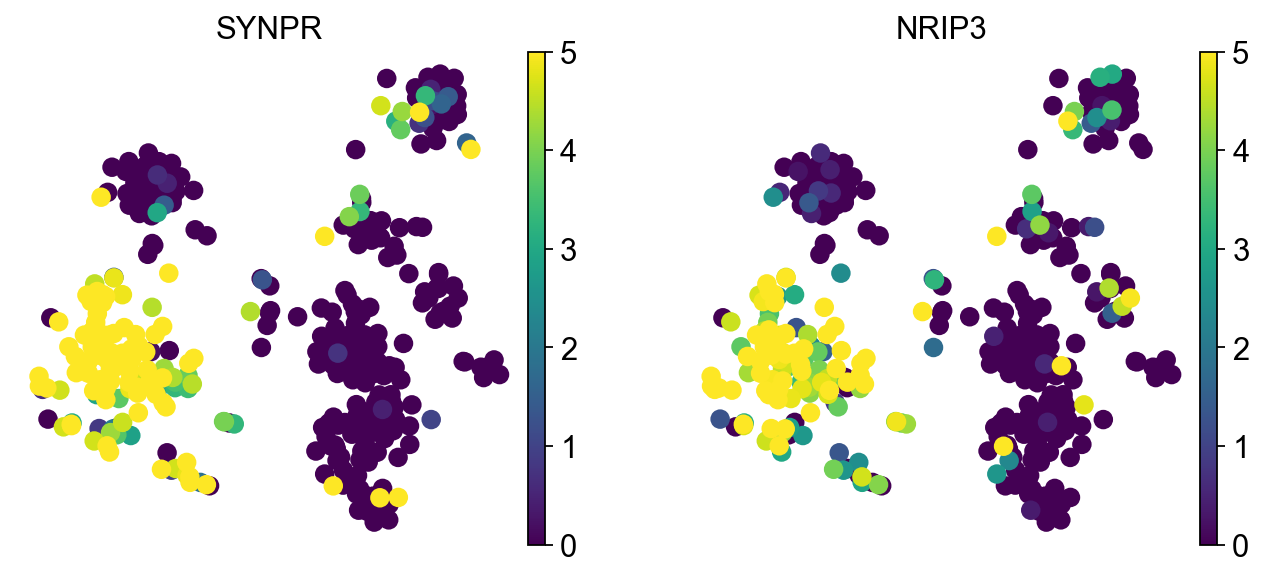

In [952]:
sc.pl.tsne(adata, color = ['SYNPR','NRIP3'], frameon = False, vmax = 5)

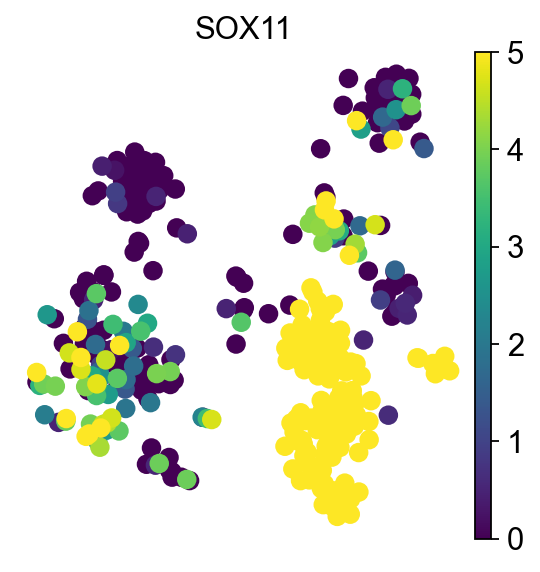

In [953]:
sc.pl.tsne(adata, color = ['SOX11'], frameon = False, vmax = 5)

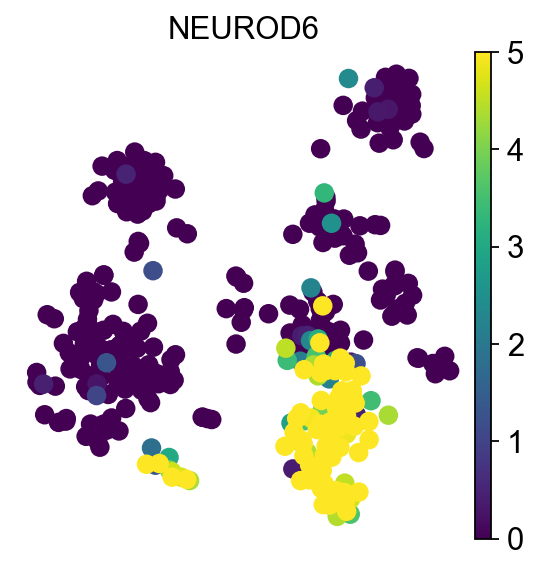

In [954]:
sc.pl.tsne(adata, color = ['NEUROD6'], frameon = False, vmax = 5)

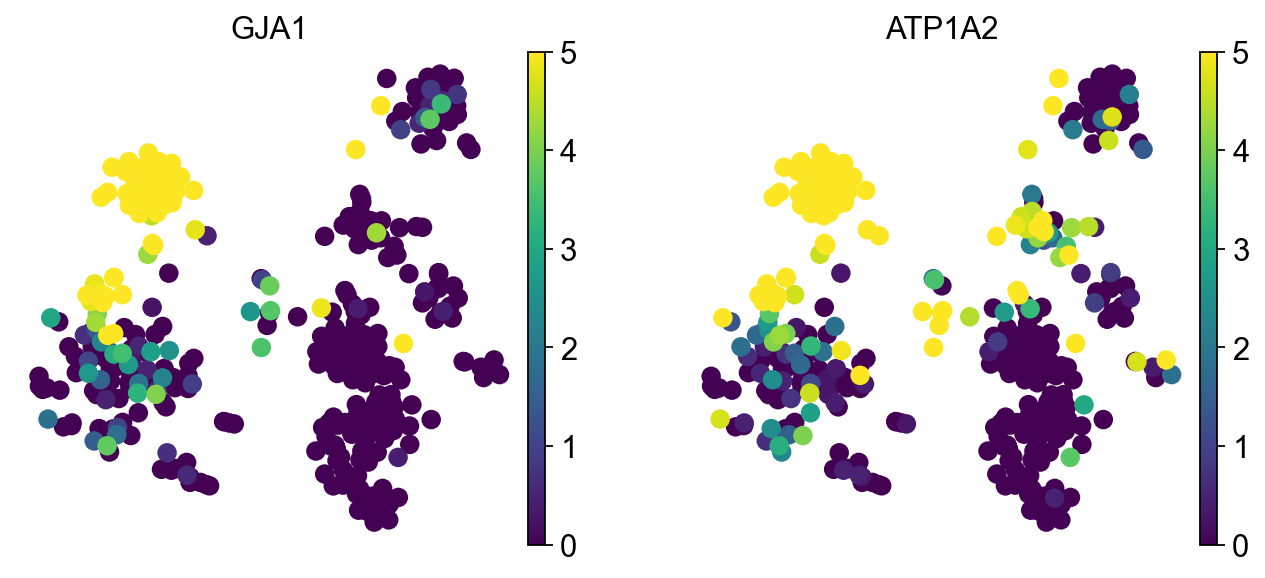

In [955]:
sc.pl.tsne(adata, color = ['GJA1','ATP1A2'], frameon = False, vmax = 5)

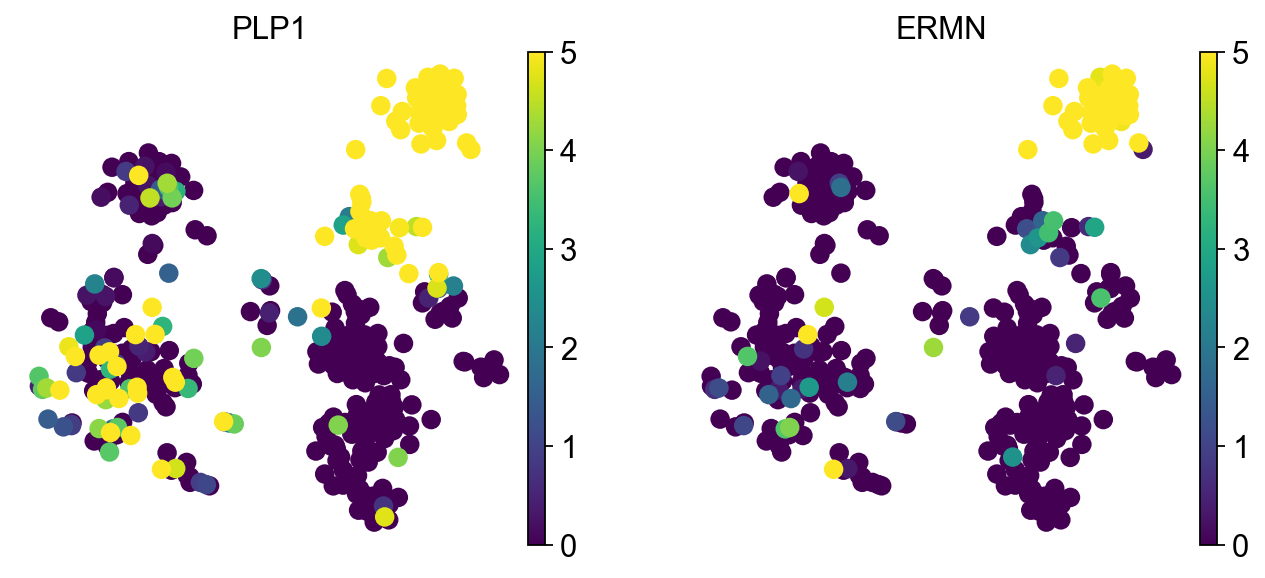

In [956]:
sc.pl.tsne(adata, color = ['PLP1','ERMN'], frameon = False, vmax = 5)

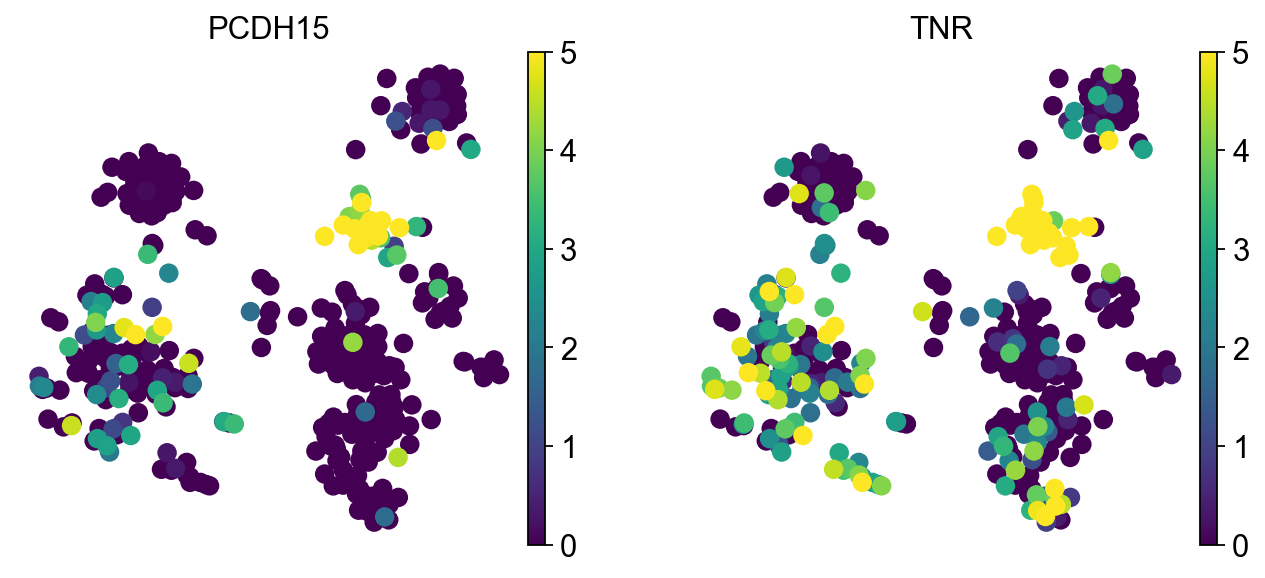

In [957]:
sc.pl.tsne(adata, color = ['PCDH15','TNR'], frameon = False, vmax = 5)

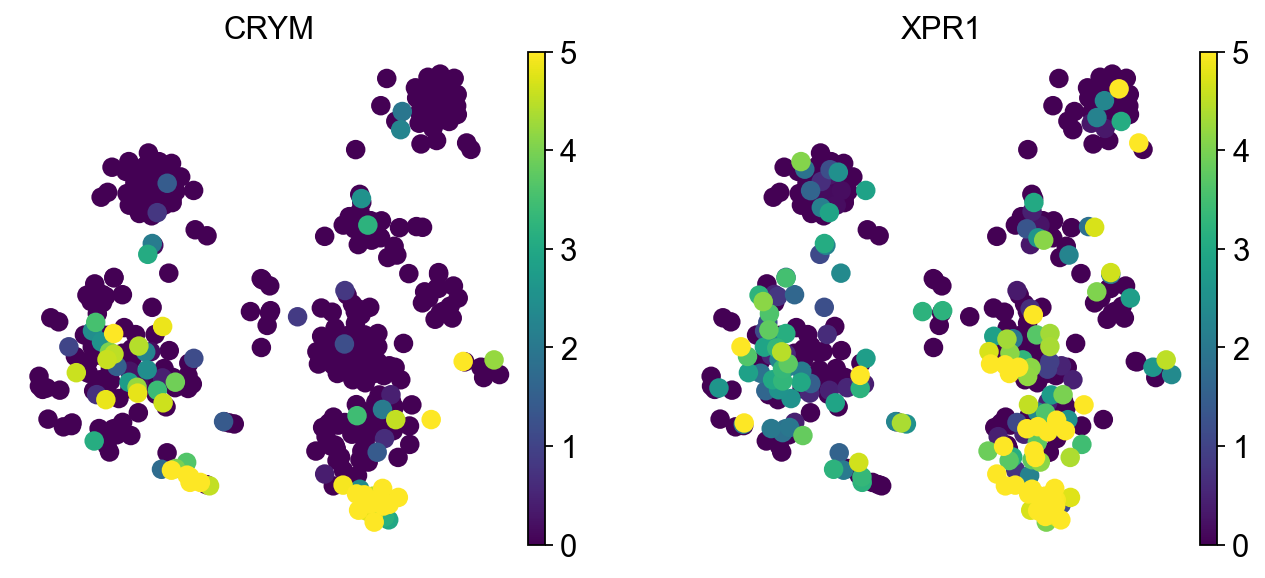

In [958]:
sc.pl.tsne(adata, color = ['CRYM','XPR1'], frameon = False, vmax = 5)

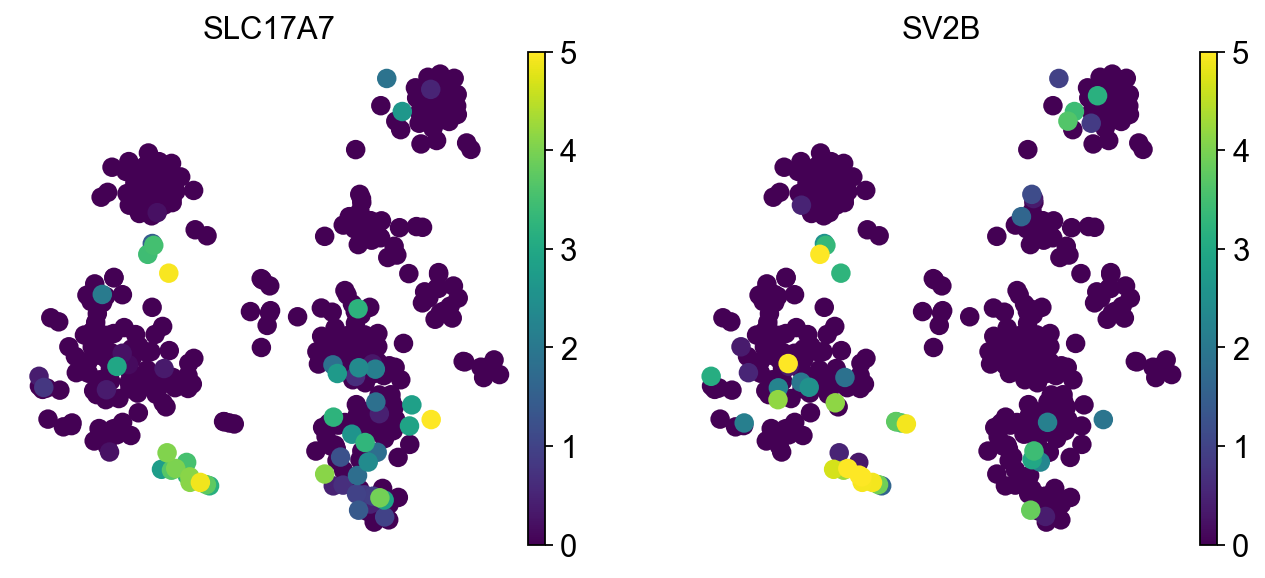

In [959]:
sc.pl.tsne(adata, color = ['SLC17A7', 'SV2B'], frameon = False, vmax = 5)

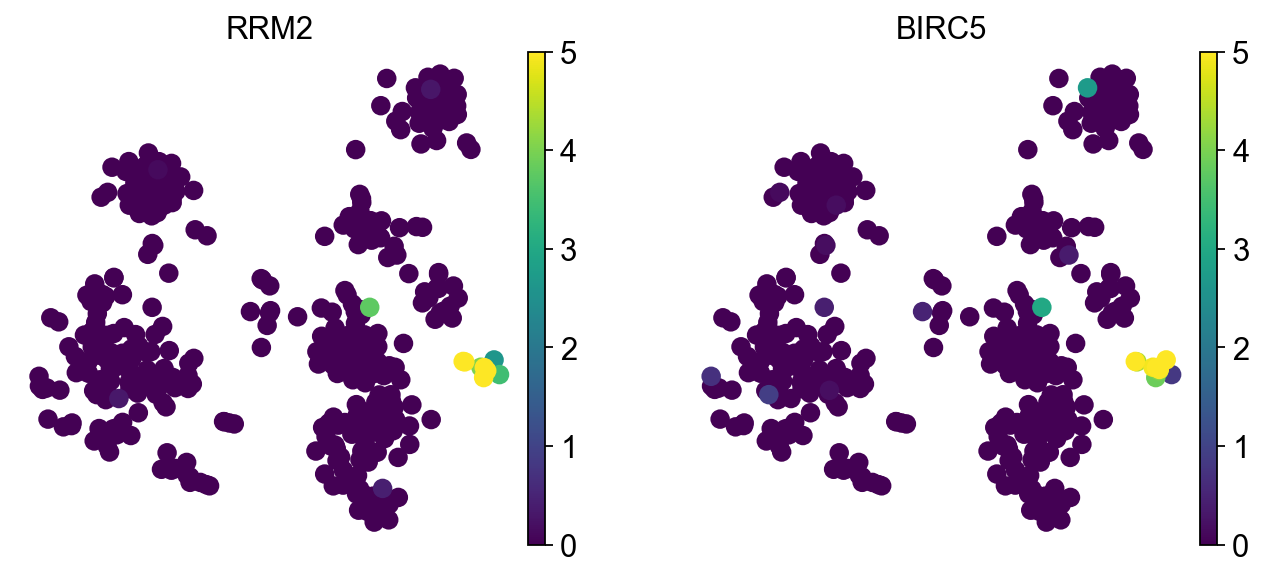

In [960]:
sc.pl.tsne(adata, color = ['RRM2', 'BIRC5'], frameon = False, vmax = 5)

In [961]:
markers[markers.names == 'RRM2'] #cross validate marker genes by comparing the logfoldchanges

,group,names,scores,logfoldchanges,pvals,pvals_adj
314705,9,RRM2,5.1203,12.669186,3.050500e-07,0.001548
